# Comparison of areas of excitation and calculated inhibition till various times of interest

In [8]:
import pickle
import os
import sys
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,12)
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
import numpy as np
import scipy.stats as ss

In [66]:
analysisFile = '/media/sahil/NCBS_Shares_BGStim/patch_data/161228/c1/plots/c1.pkl'
plotPath = os.path.dirname(analysisFile)
with open(analysisFile, 'rb') as inputFile:
    neuron = pickle.load(inputFile)

In [67]:
neuron.features

{0: 'epsp_max',
 1: 'epsp_area',
 2: 'epsp_avg',
 3: 'epsp_time_to_peak',
 4: 'epsp_area_to_peak',
 5: 'epsp_min',
 6: 'epsp_onset'}

## Areas for the entire time course of excitation(GABAzine) and calculated inhibtion(GABAzine - Control)

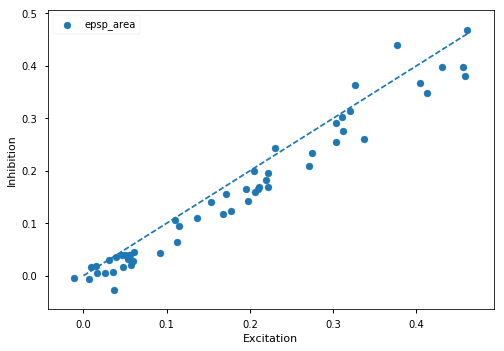

In [68]:
exc = {}
control = {}
feature = 1
for type in neuron.experiment.keys():
        for squares in neuron.experiment[type].keys(): 
            for index in neuron.experiment[type][squares].coordwise:
                if feature in neuron.experiment[type][squares].coordwise[index].feature:
                    if type == "Control":
                        control.update({index :neuron.experiment[type][squares].coordwise[index].average_feature[feature]})
                    elif type=="GABAzine":
                        exc.update({index :neuron.experiment[type][squares].coordwise[index].average_feature[feature]})
                    else:
                        print ("WTF?")
                else:
                    break

exc_list, control_list = [], []
for key in exc.keys():
    if key in control.keys():
        exc_list.append( exc[key])
        control_list.append( control[key])

exc_list, control_list = np.array(exc_list), np.array(control_list)
f, ax = plt.subplots()
ax.scatter(exc_list, exc_list-control_list, label=neuron.features[feature])
xlim, ylim = (0, max(exc_list)), (0, max(exc_list))
ax.plot(xlim,ylim,'--')
ax.set_xlabel("Excitation")
ax.set_ylabel("Inhibition")
ax.legend()
plt.show()

## Areas for the time course of excitation(GABAzine) and calculated inhibtion(GABAzine - Control) till their individual times to peak.

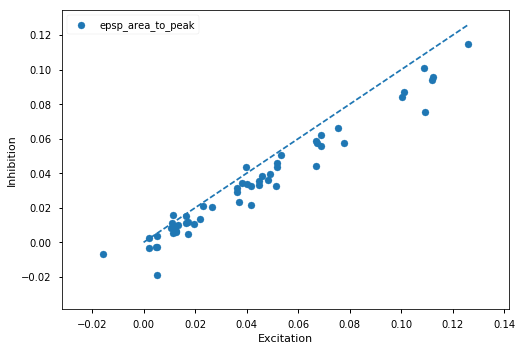

In [69]:
exc = {}
control = {}
feature = 4
for type in neuron.experiment.keys():
        for squares in neuron.experiment[type].keys(): 
            for index in neuron.experiment[type][squares].coordwise:
                if feature in neuron.experiment[type][squares].coordwise[index].feature:
                    if type == "Control":
                        control.update({index :neuron.experiment[type][squares].coordwise[index].average_feature[feature]})
                    elif type=="GABAzine":
                        exc.update({index :neuron.experiment[type][squares].coordwise[index].average_feature[feature]})
                    else:
                        print ("WTF?")
                else:
                    break

exc_list, control_list = [], []
for key in exc.keys():
    if key in control.keys():
        exc_list.append( exc[key])
        control_list.append( control[key])

exc_list, control_list = np.array(exc_list), np.array(control_list)
f, ax = plt.subplots()
ax.scatter(exc_list, exc_list-control_list, label=neuron.features[feature])
xlim, ylim = (0, max(exc_list)), (0, max(exc_list))
ax.plot(xlim,ylim,'--')
ax.set_xlabel("Excitation")
ax.set_ylabel("Inhibition")
ax.legend()
plt.show()

As we can see they are tightly balanced.

## Areas for the time course of excitation(GABAzine) and calculated inhibtion(GABAzine - Control) till time to peak for Control.

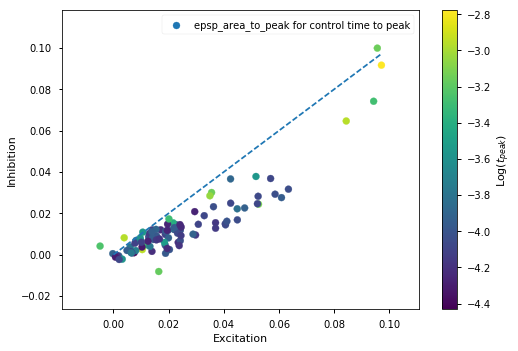

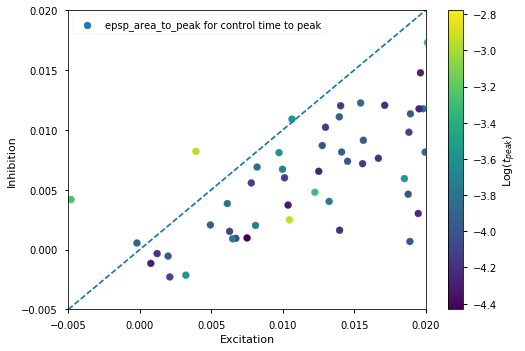

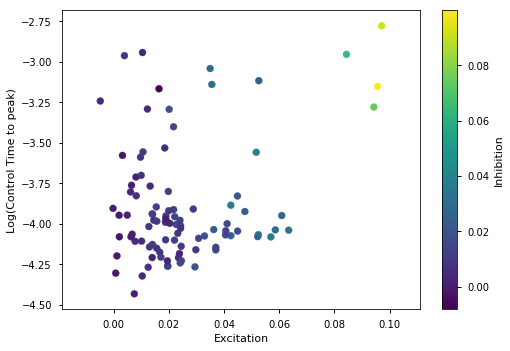

In [70]:
exc = {}
control = {}
time_to_peak = {} # Control time to peak
feature = 4

for squares in neuron.experiment["Control"].keys(): 
    for index in neuron.experiment["Control"][squares].coordwise:
        if feature in neuron.experiment["Control"][squares].coordwise[index].feature:
            control.update({index :neuron.experiment["Control"][squares].coordwise[index].average_feature[feature]})
            time_to_peak.update({index :neuron.experiment["Control"][squares].coordwise[index].average_feature[3]})

for index in control:
    squares = len(index)
    if squares in neuron.experiment["GABAzine"]:
        if index in neuron.experiment["GABAzine"][squares].coordwise:
            each_trial = []
            for trial in neuron.experiment["GABAzine"][squares].coordwise[index].trials:
                each_trial.append(np.trapz(trial.interestWindow[:int(time_to_peak[index]*trial.F_sample)], dx=1./trial.F_sample))
            exc.update({index :np.average(each_trial)})

exc_list, control_list, ttp = [], [], []
for key in exc.keys():
    if key in control.keys():
        exc_list.append( exc[key])
        control_list.append( control[key])
        ttp.append(time_to_peak[key])

exc_list, control_list = np.array(exc_list), np.array(control_list)
inh_list = (exc_list-control_list)
f, ax = plt.subplots()
scatter = ax.scatter(exc_list, inh_list, c=np.log(ttp), label=neuron.features[feature] + ' for control time to peak')
xlim, ylim = (0, max(exc_list)), (0, max(exc_list))
ax.plot(xlim,ylim,'--')
ax.set_xlabel("Excitation")
ax.set_ylabel("Inhibition")
ax.legend()
plt.colorbar(scatter, label="Log($t_{peak}$)")
plt.show()

f, ax = plt.subplots()
scatter = ax.scatter(exc_list, inh_list, c=np.log(ttp), label=neuron.features[feature] + ' for control time to peak')
xlim, ylim = (-0.005, 0.02), (-0.005, 0.02)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot(xlim,ylim,'--')
ax.set_xlabel("Excitation")
ax.set_ylabel("Inhibition")
ax.legend()
plt.colorbar(scatter, label="Log($t_{peak}$)")
plt.show()

f, ax = plt.subplots()
scatter = ax.scatter(exc_list,np.log(ttp), c=inh_list)
ax.set_xlabel("Excitation")
ax.set_ylabel("Log(Control Time to peak)")
ax.legend()
plt.colorbar(scatter, label="Inhibition")
plt.show()

In [18]:
def cumulativeArea(trace, time, samplingRate):
    cumulativeArea = []
    for index in range(2,int(time*samplingRate)):
        cumulativeArea.append(np.trapz(trial.interestWindow[:index], dx=1./samplingRate))
    return np.array(cumulativeArea)/cumulativeArea[-1]

In [19]:
exc_max, exc_area = [], []
control_max, control_area = [], []
time_to_peak = {} # Control time to peak
feature = 1

for squares in neuron.experiment["Control"].keys(): 
    for index in neuron.experiment["Control"][squares].trial:
        if neuron.experiment["Control"][squares].trial[index].feature[3]:
            control_area.append(cumulativeArea(neuron.experiment["Control"][squares].trial[index].interestWindow, neuron.experiment["Control"][squares].trial[index].feature[3], neuron.experiment["Control"][squares].trial[index].F_sample))
            control_max.append(neuron.experiment["Control"][squares].trial[index].feature[0])
        else:
            print (np.argmax(neuron.experiment["Control"][squares].trial[index].interestWindow))

for squares in neuron.experiment["GABAzine"].keys(): 
    for index in neuron.experiment["GABAzine"][squares].trial:
        if neuron.experiment["GABAzine"][squares].trial[index].feature[3]:
            exc_area.append(cumulativeArea(neuron.experiment["GABAzine"][squares].trial[index].interestWindow, neuron.experiment["GABAzine"][squares].trial[index].feature[3], neuron.experiment["GABAzine"][squares].trial[index].F_sample))
            exc_max.append(neuron.experiment["GABAzine"][squares].trial[index].feature[0])
        else:
            print (np.argmax(neuron.experiment["Control"][squares].trial[index].interestWindow))

0
0
0
0
0
0
1963
614


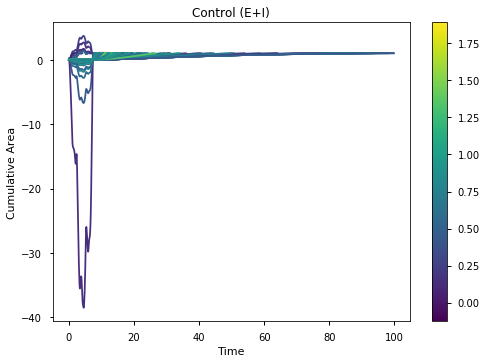

In [20]:
f, ax = plt.subplots()
norm = matplotlib.colors.Normalize(
    vmin=np.min(control_max),
    vmax=np.max(control_max))
c_m = matplotlib.cm.viridis
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for area, maximum in zip(control_area, control_max):
    ax.plot(np.arange(len(area))*(1./20), area, color=s_m.to_rgba(maximum))
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative Area")
plt.colorbar(s_m)
plt.title("Control (E+I)")

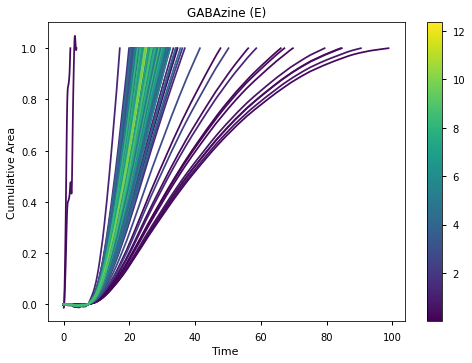

In [21]:
f, ax = plt.subplots()

norm = matplotlib.colors.Normalize(
    vmin=np.min(exc_max),
    vmax=np.max(exc_max))
c_m = matplotlib.cm.viridis
s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

for area, maximum in zip(exc_area, exc_max):
    ax.plot(np.arange(len(area))*(1./20), area, color=s_m.to_rgba(maximum))
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative Area")
plt.colorbar(s_m)
plt.title("GABAzine (E)")

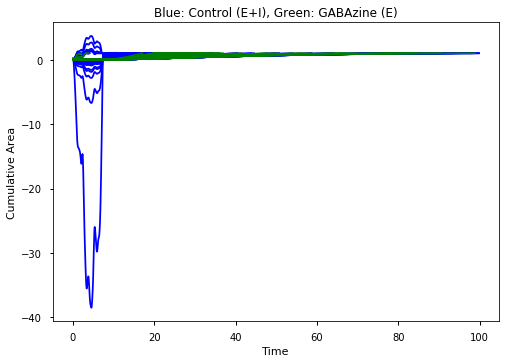

In [22]:
f, ax = plt.subplots()
for area, maximum in zip(control_area, control_max):
    ax.plot(np.arange(len(area))*(1./20), area, color='b')
for area, maximum in zip(exc_area, exc_max):
    ax.plot(np.arange(len(area))*(1./20), area, color='g')
ax.set_xlabel("Time")
ax.set_ylabel("Cumulative Area")
plt.title("Blue: Control (E+I), Green: GABAzine (E)")

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


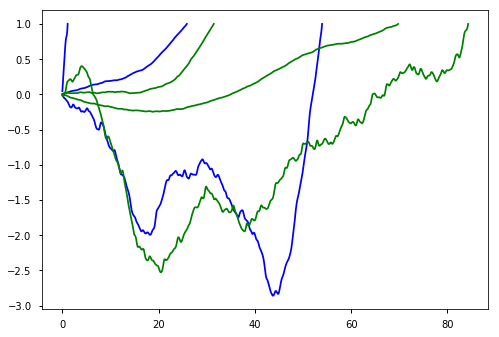

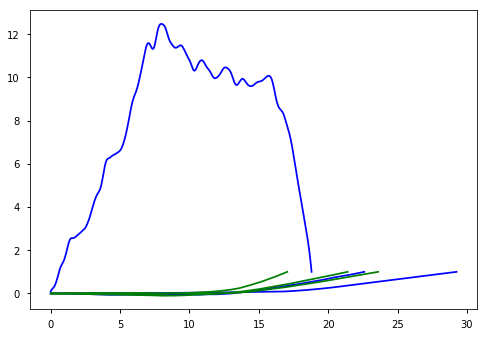

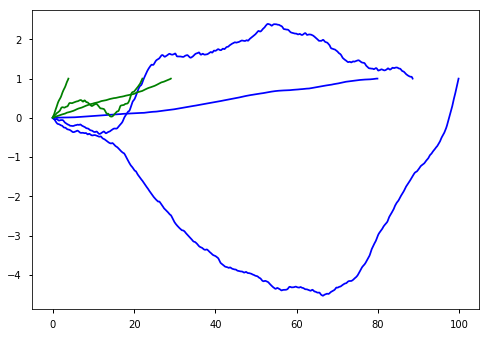

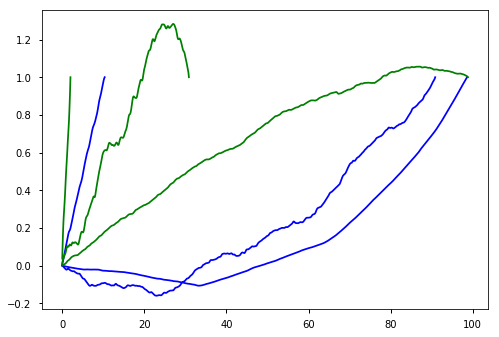

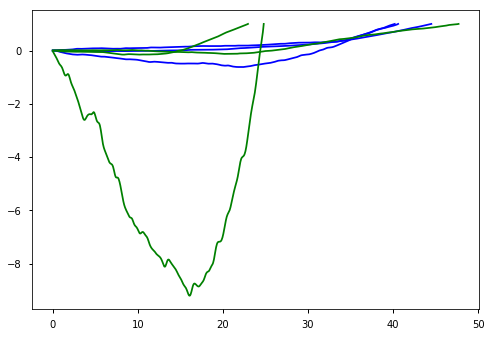

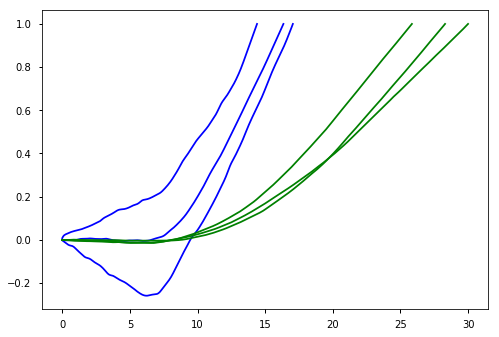

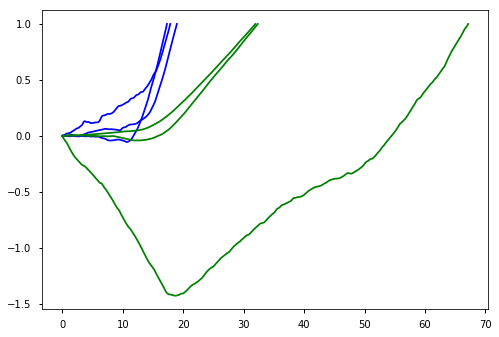

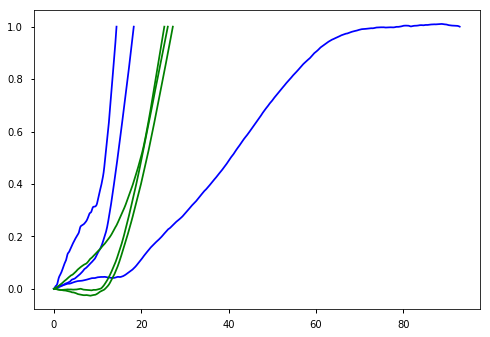

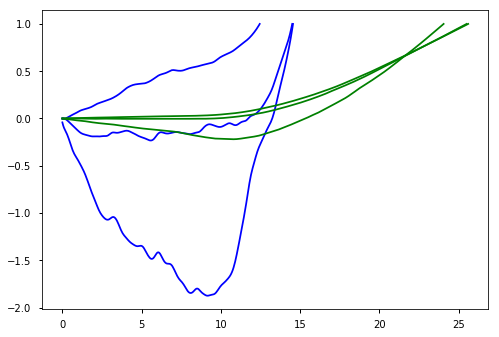

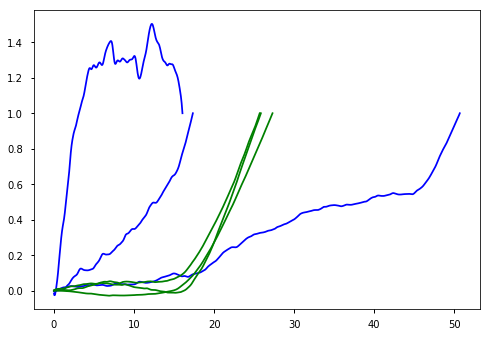

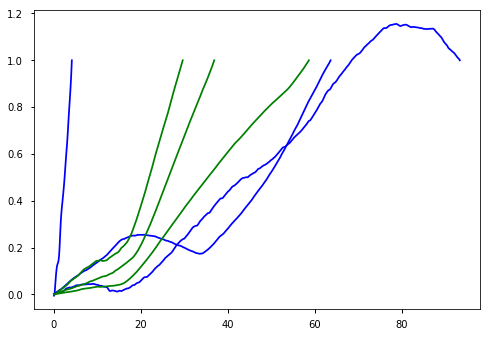

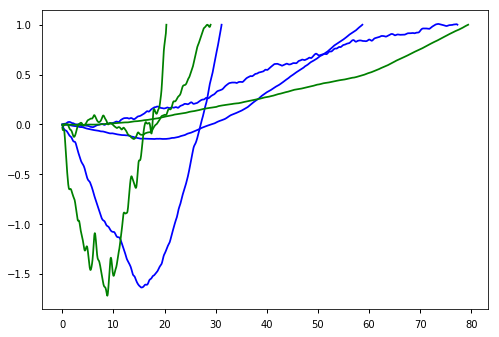

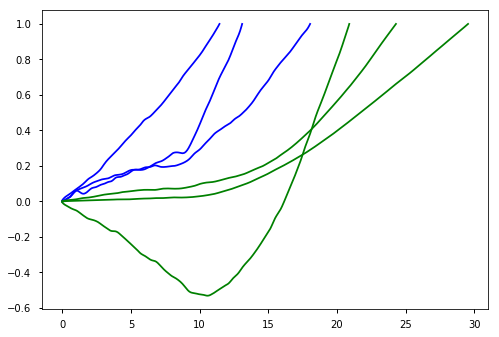

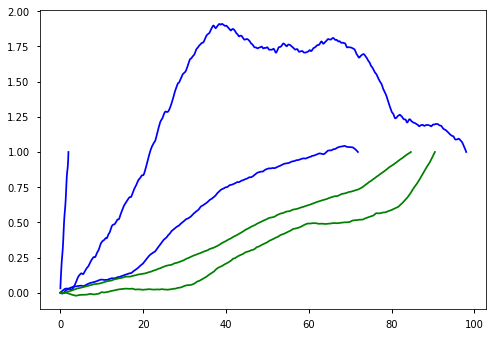

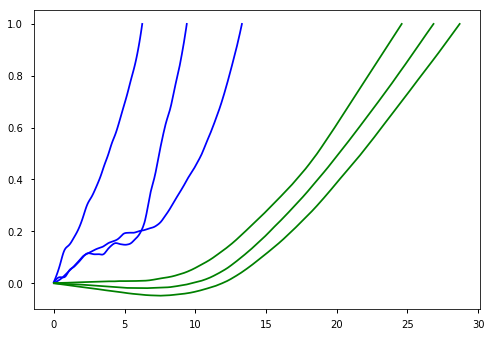

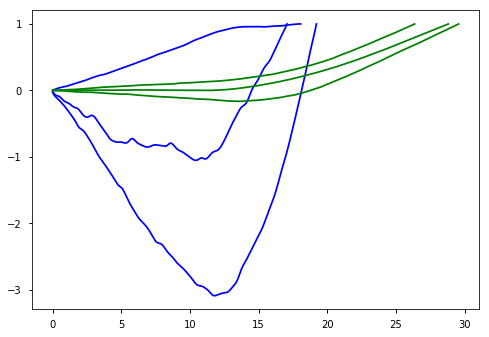

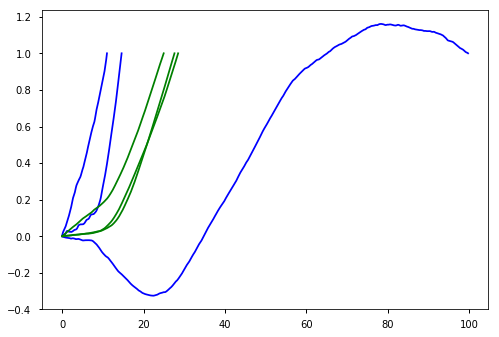

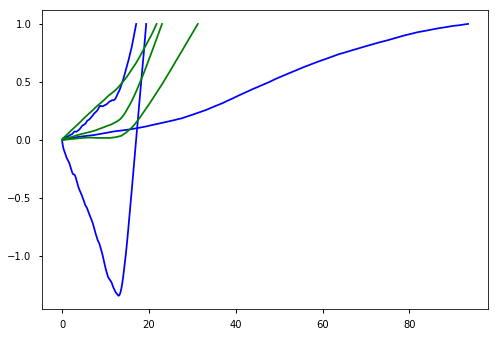

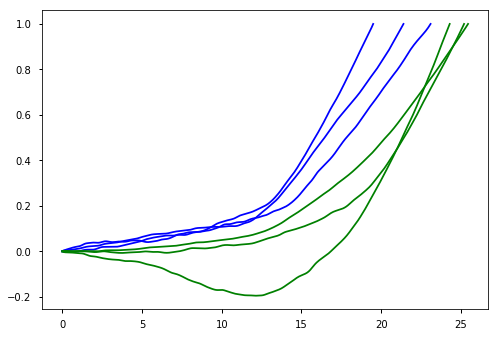

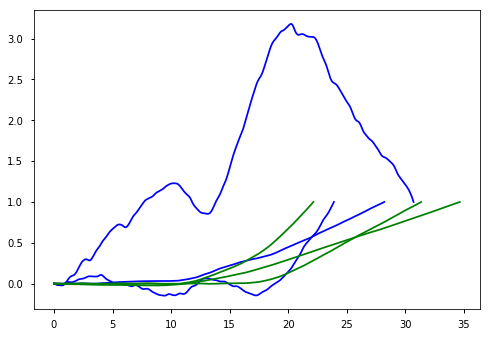

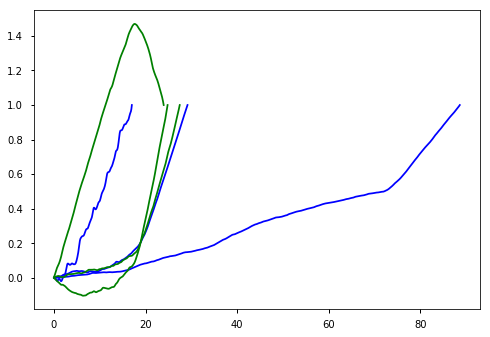

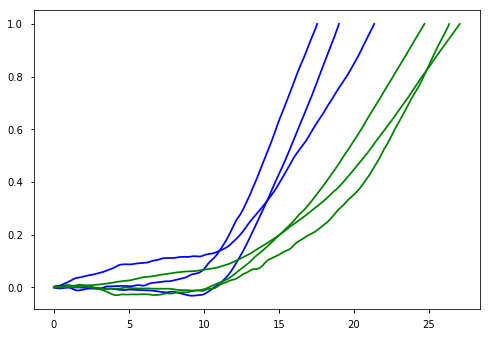

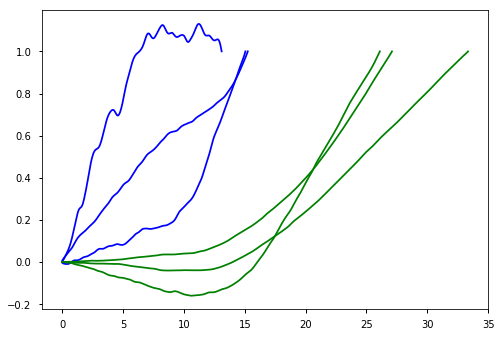

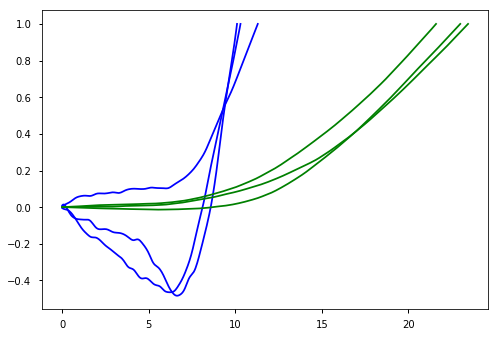

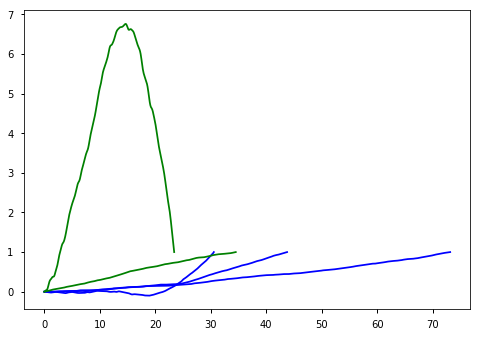

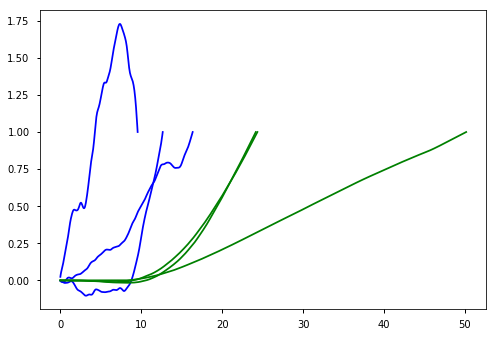

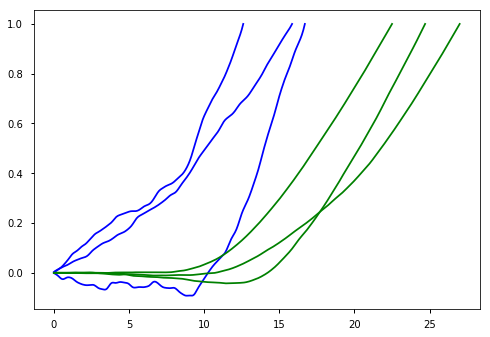

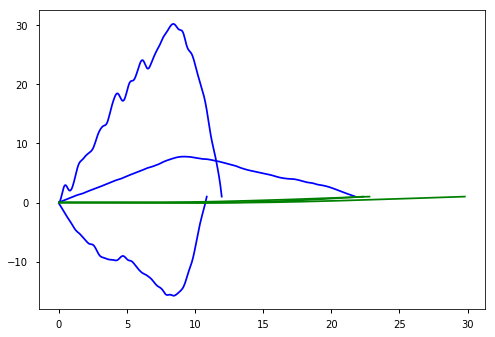

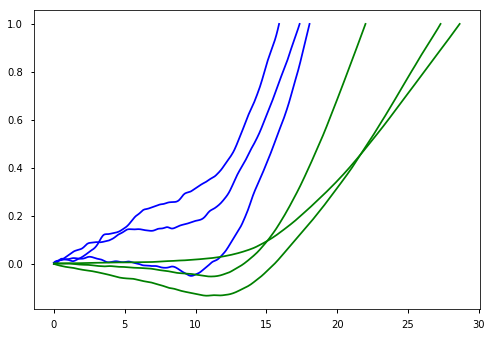

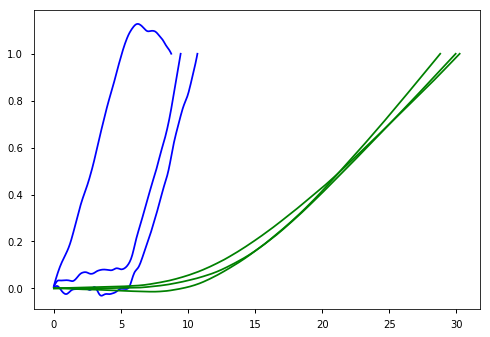

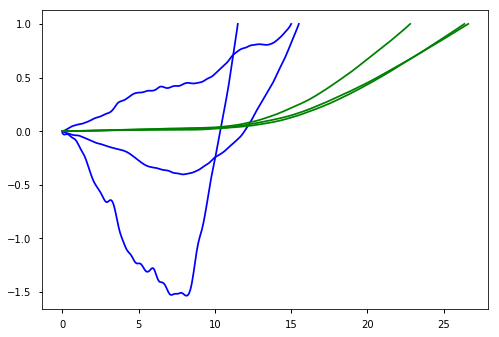

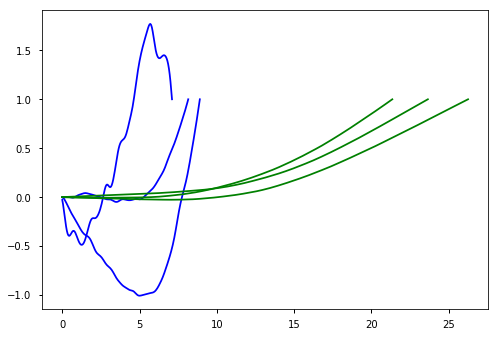

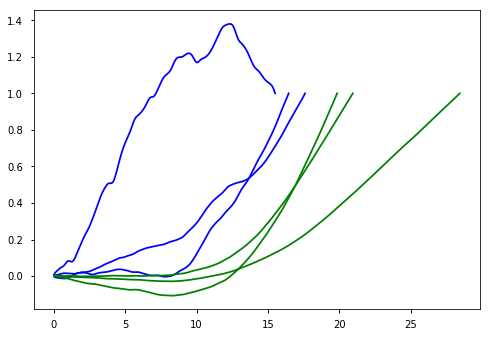

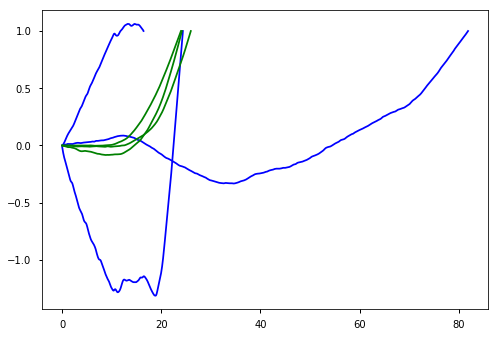

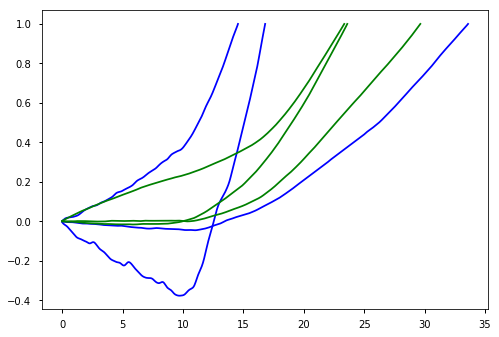

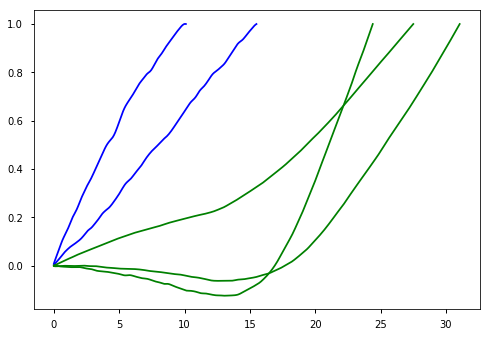

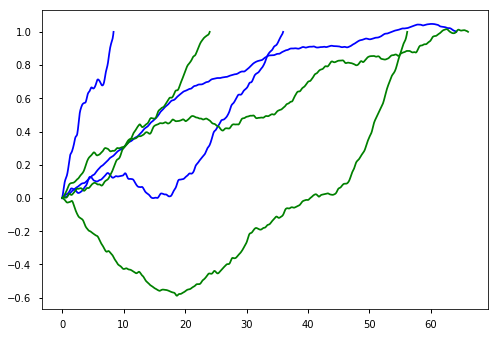

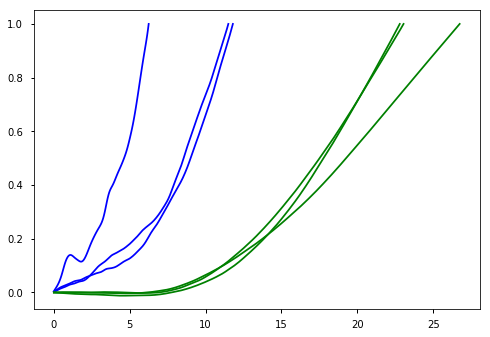

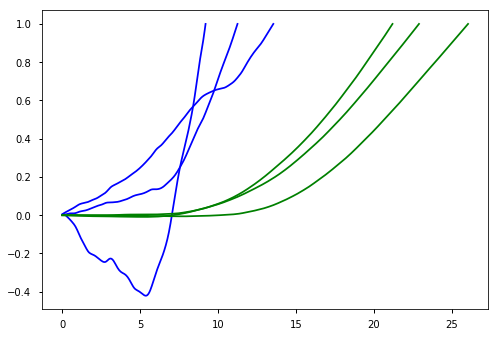

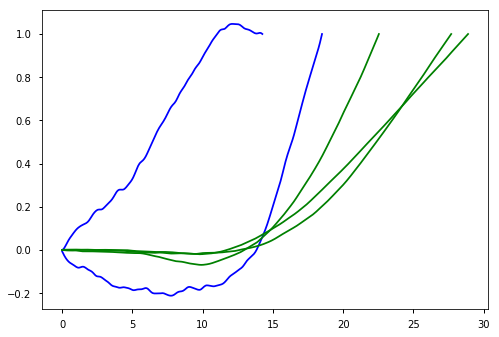

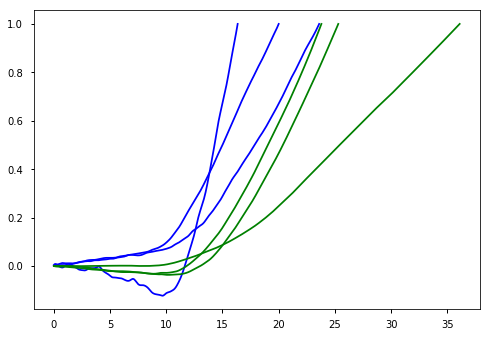

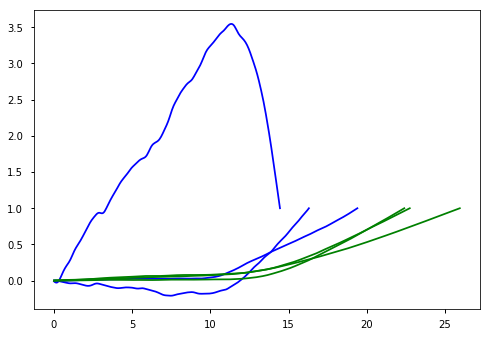

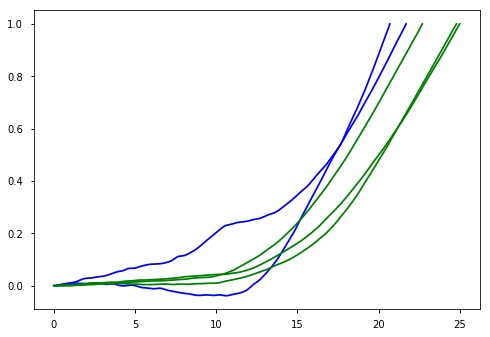

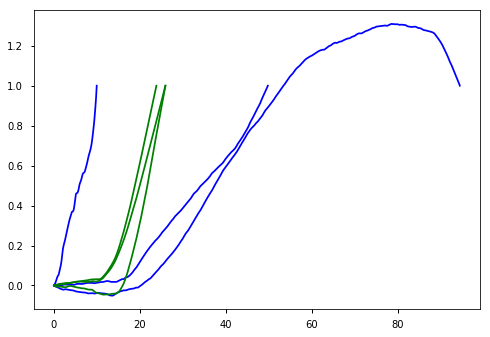

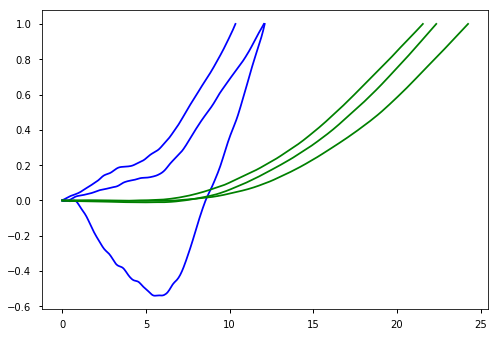

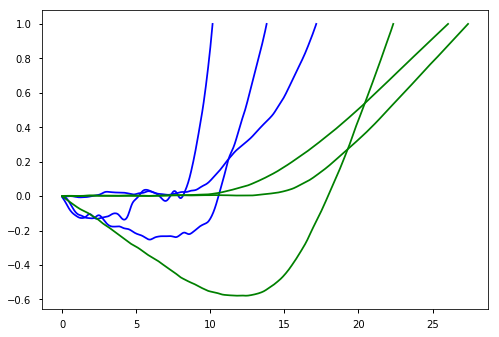

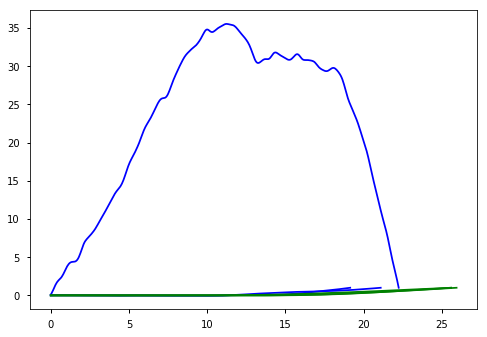

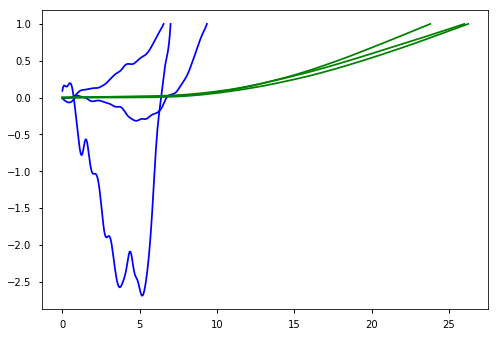

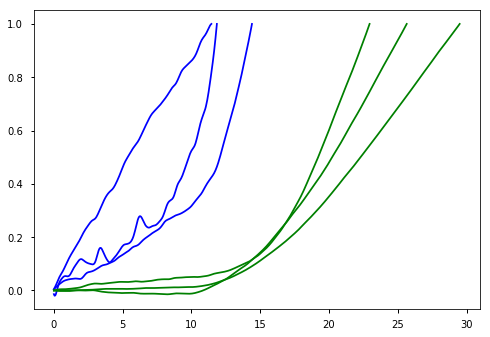

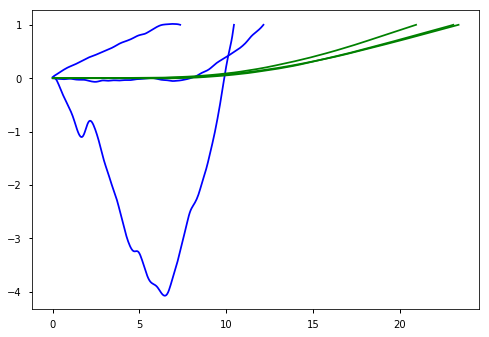

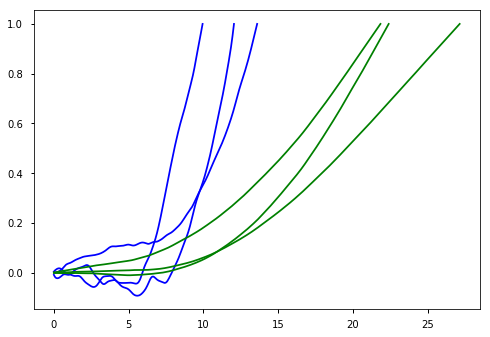

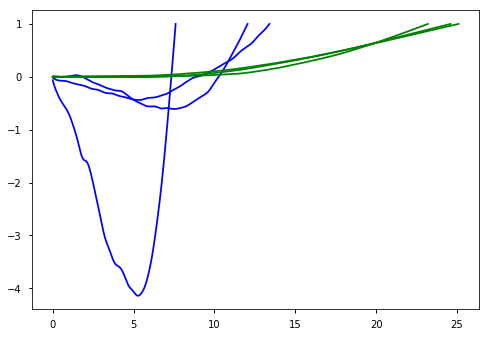

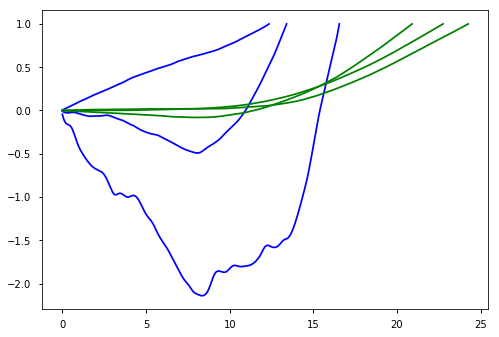

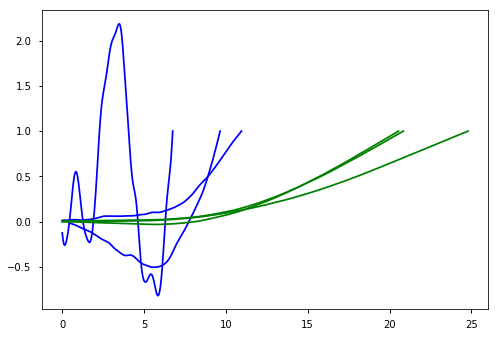

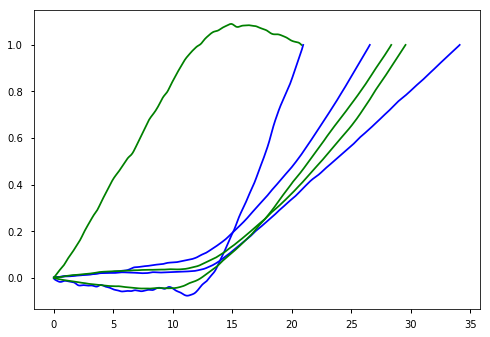

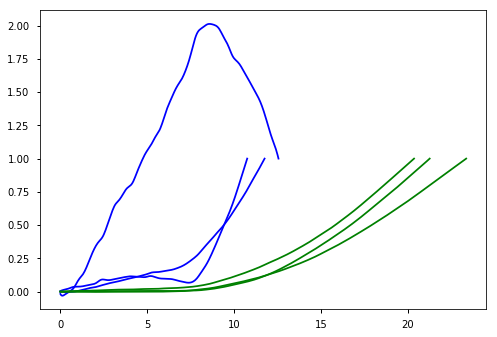

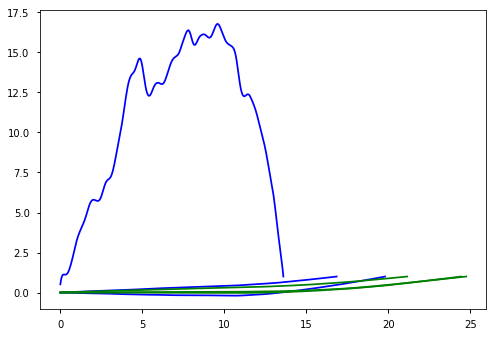

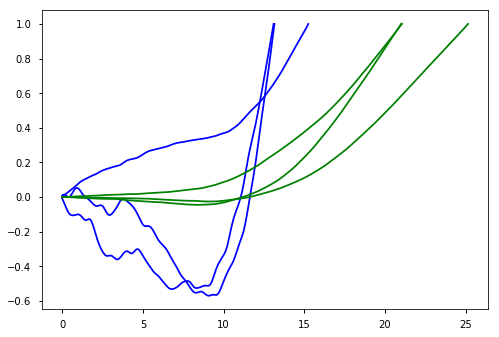

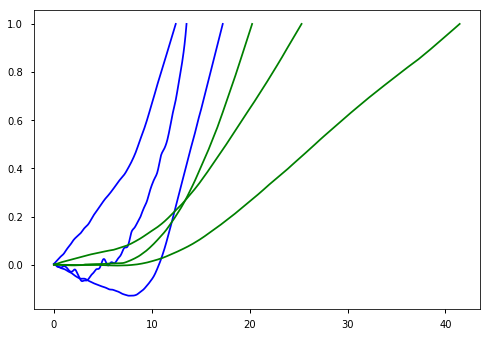

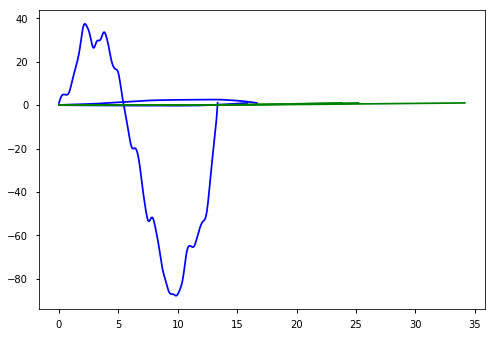

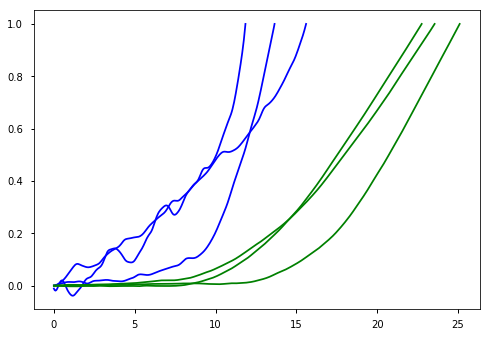

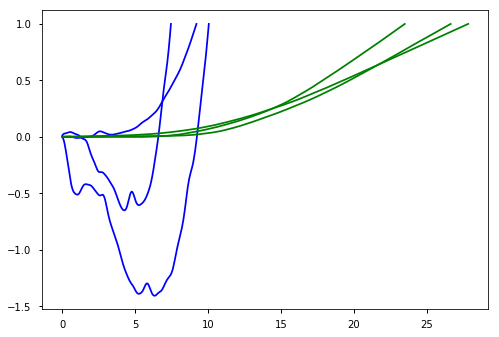

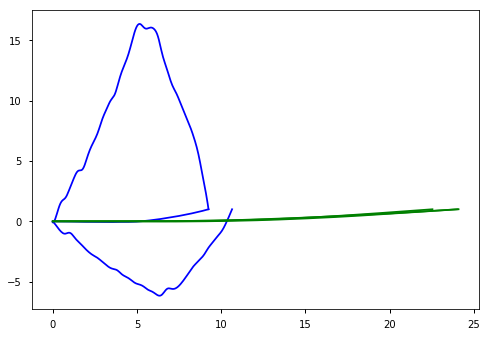

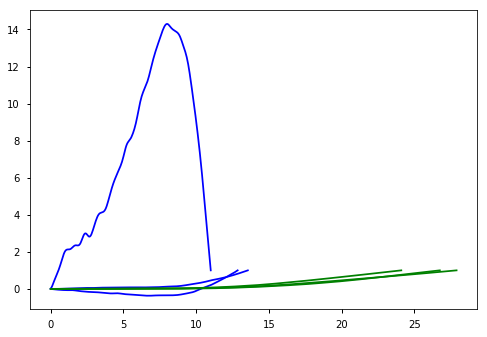

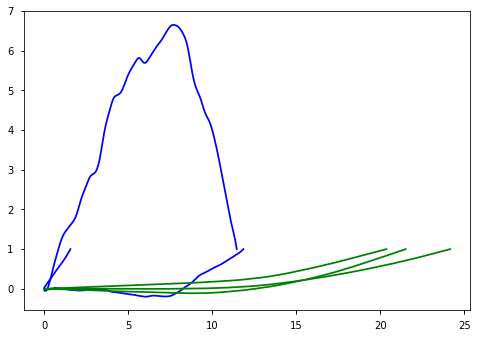

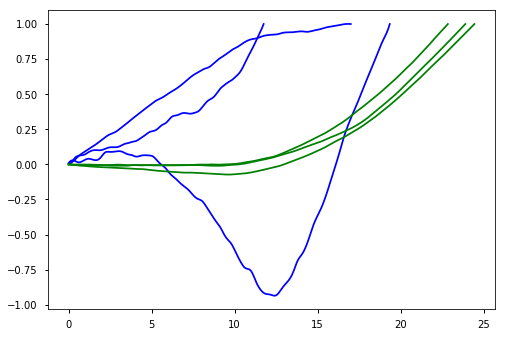

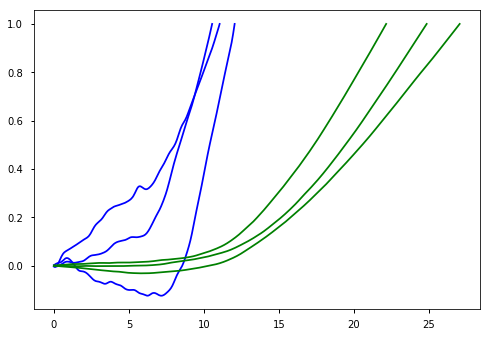

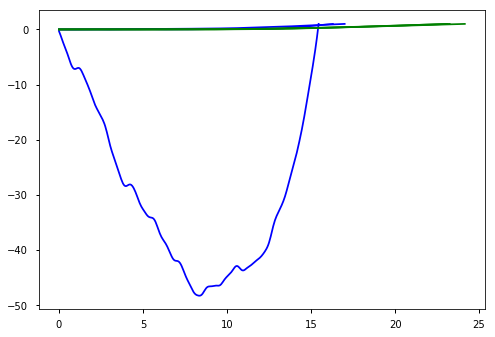

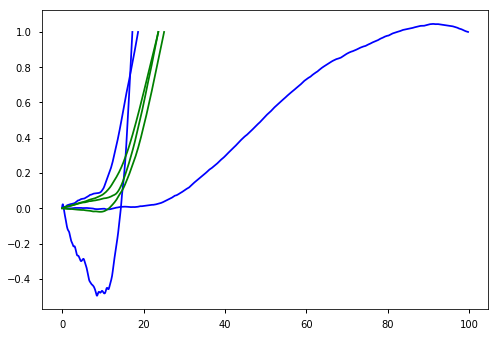

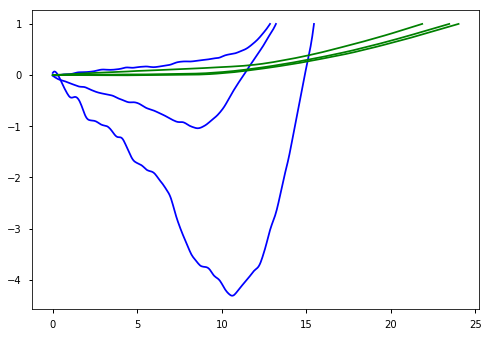

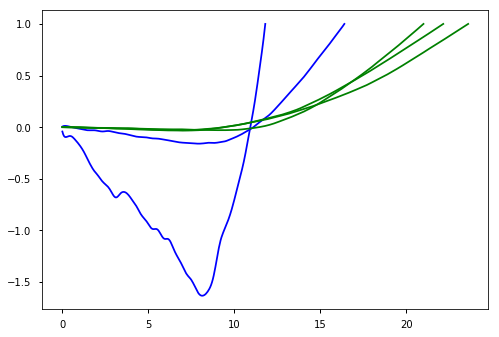

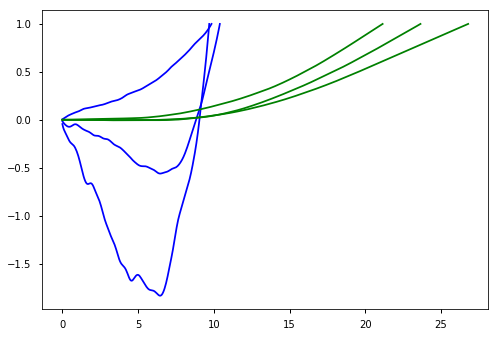

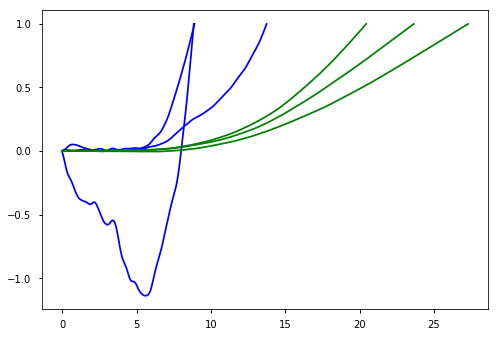

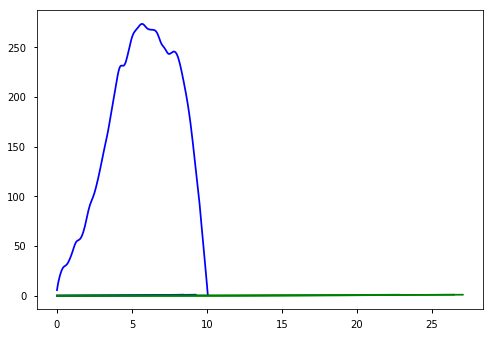

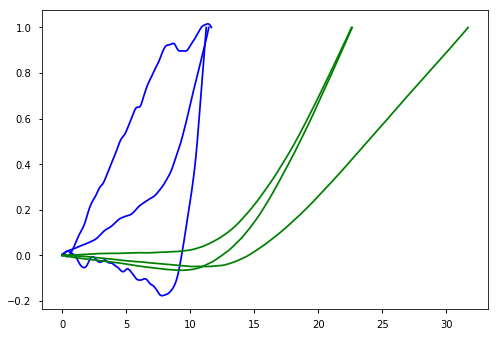

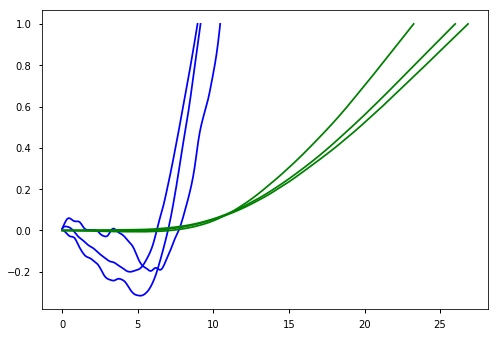

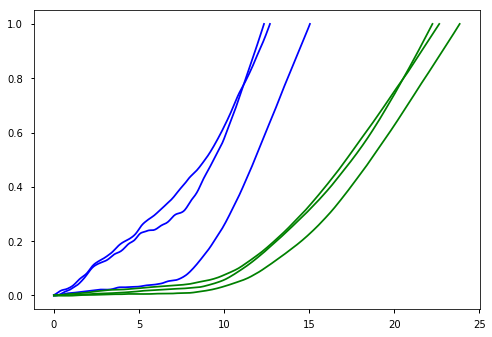

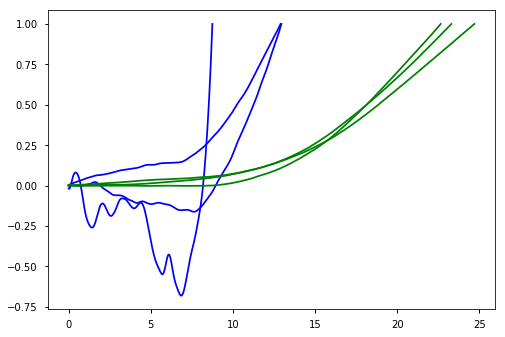

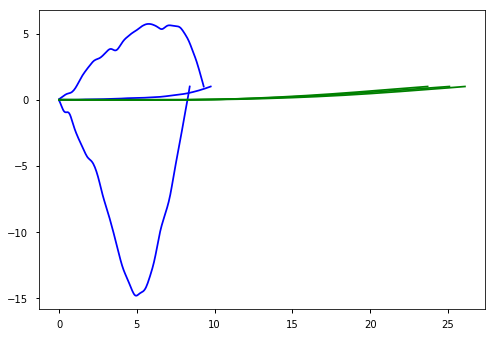

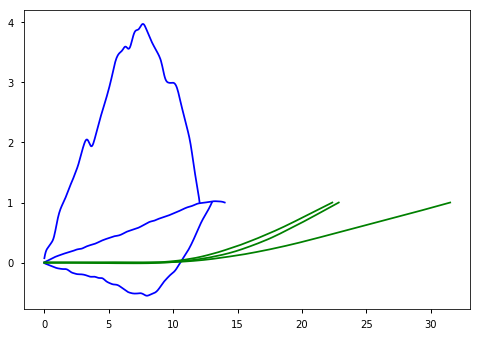

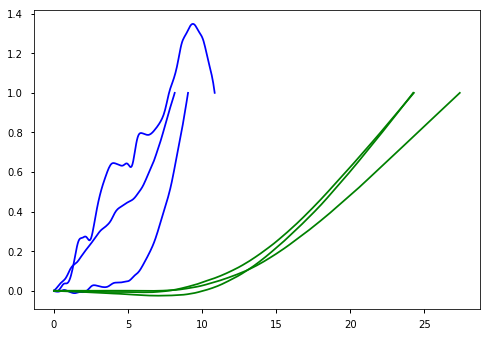

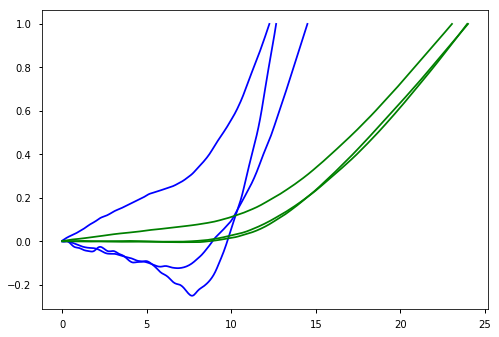

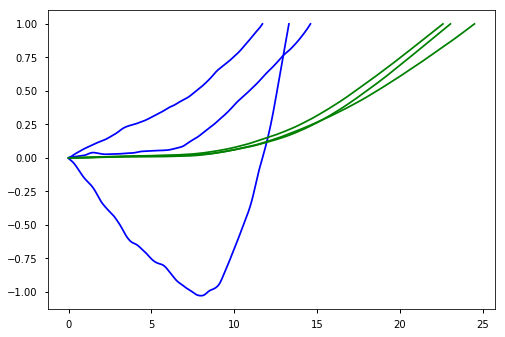

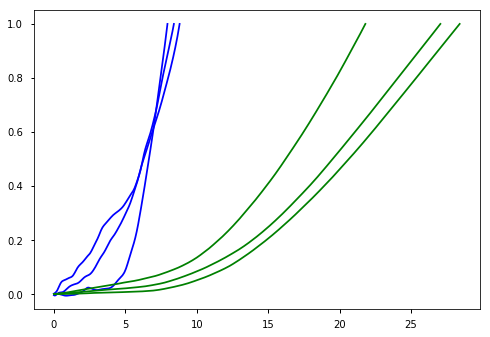

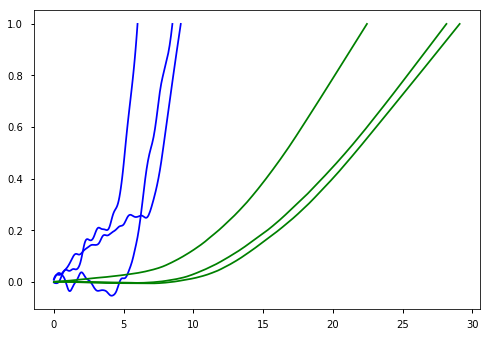

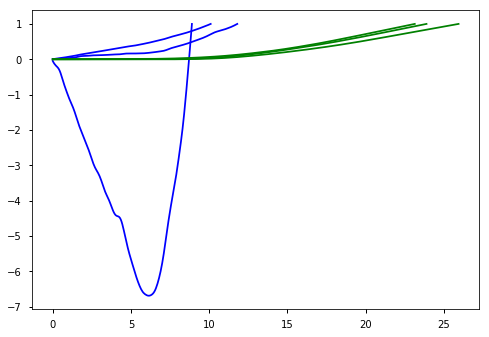

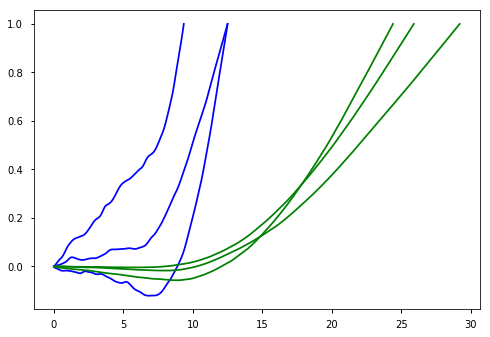

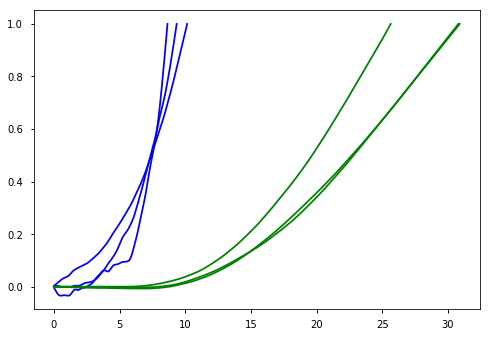

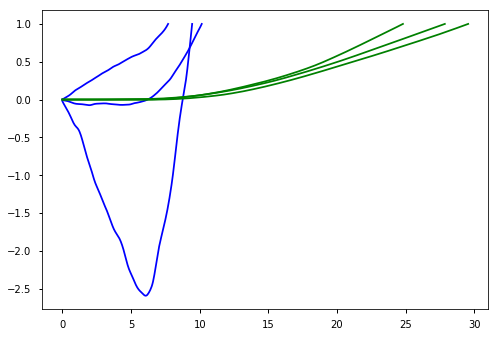

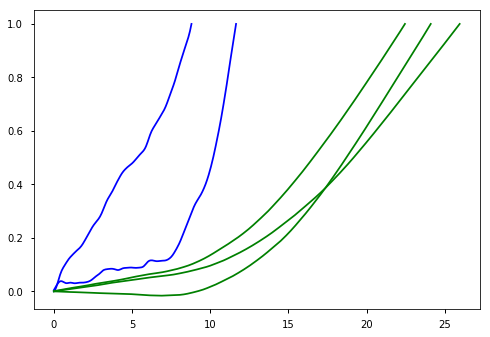

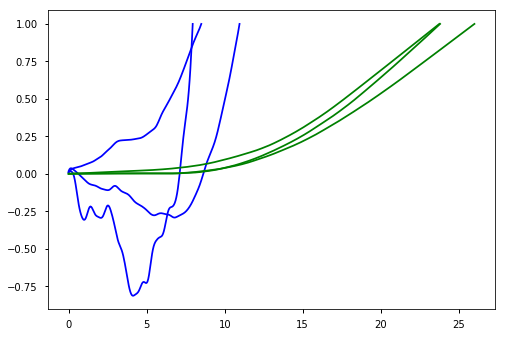

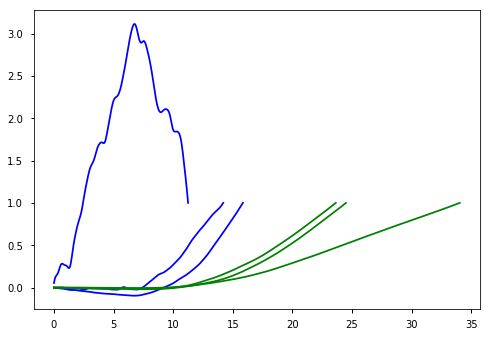

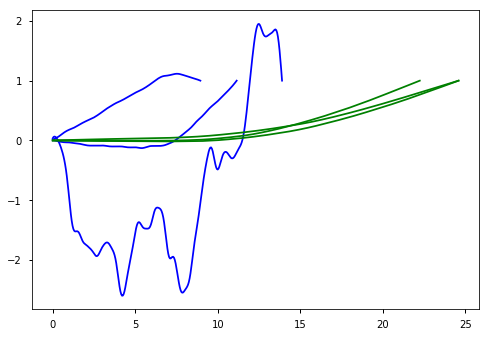

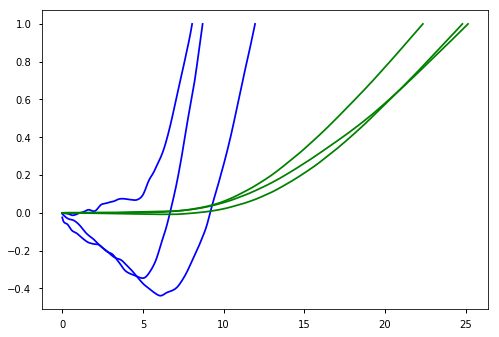

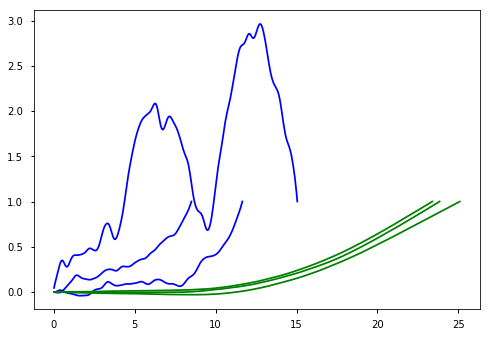

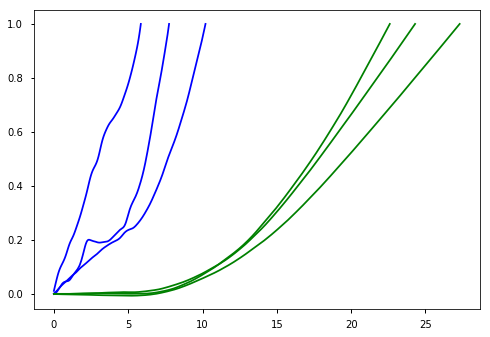

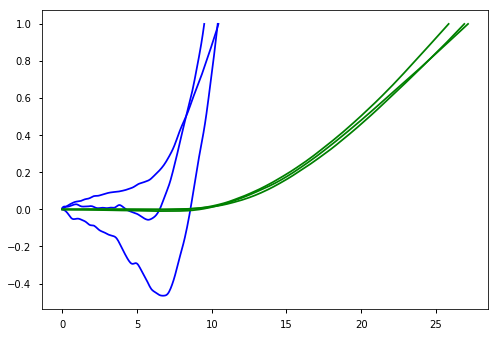

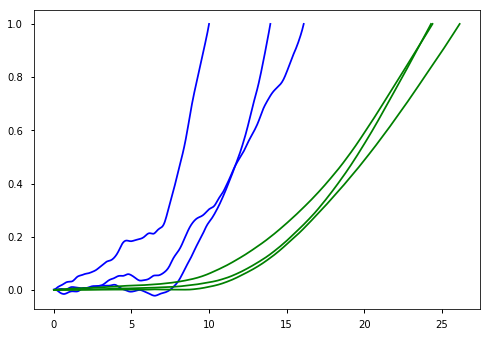

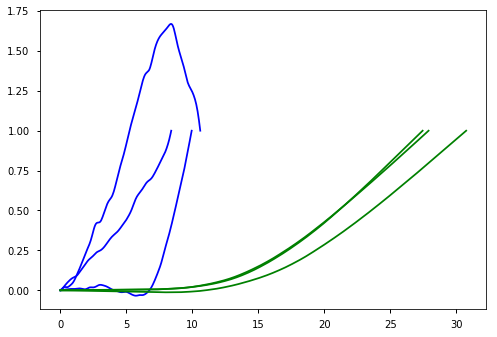

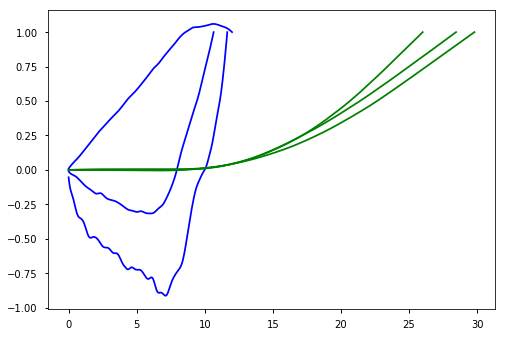

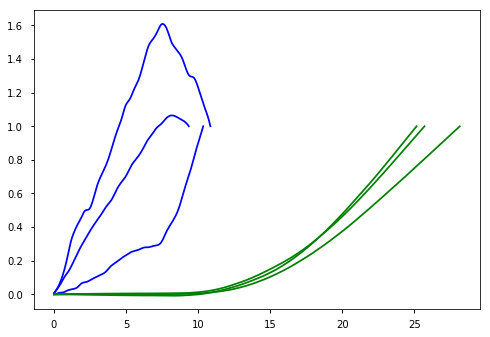

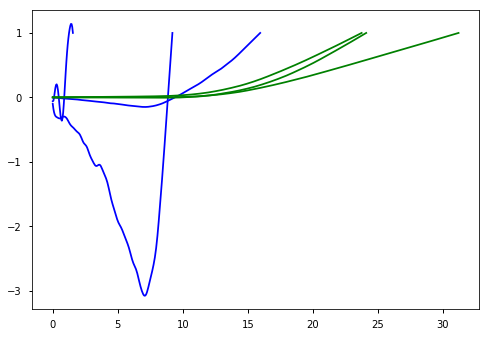

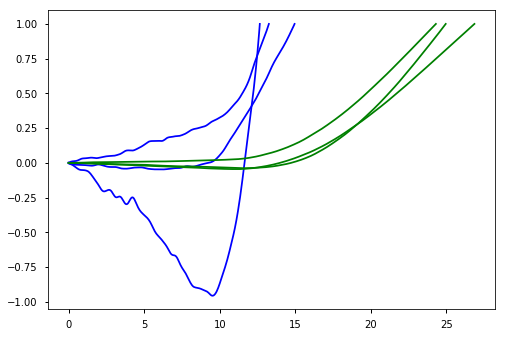

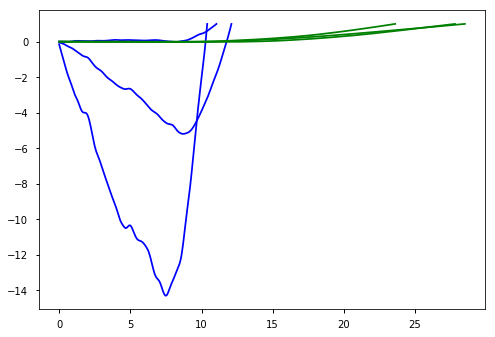

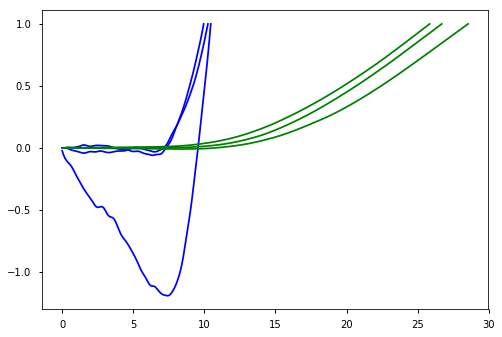

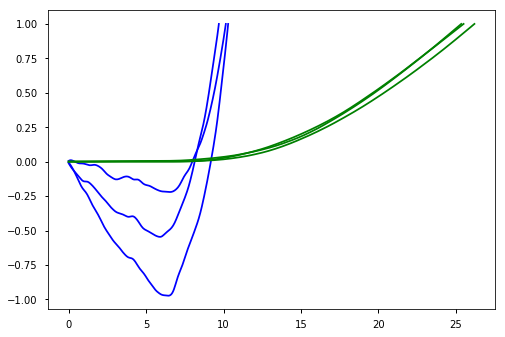

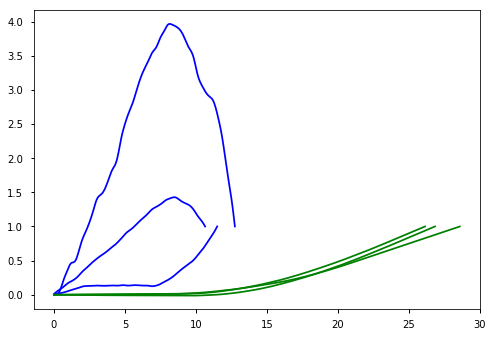

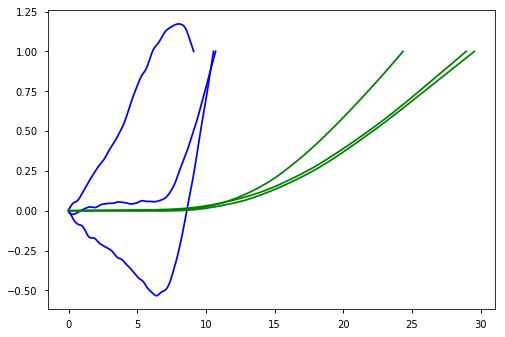

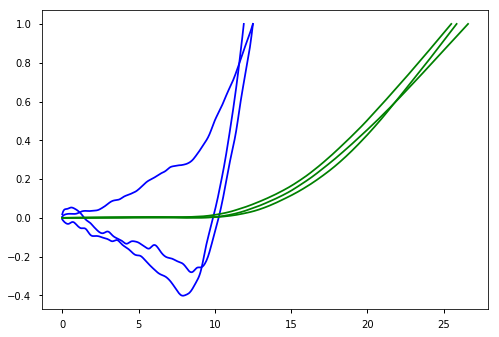

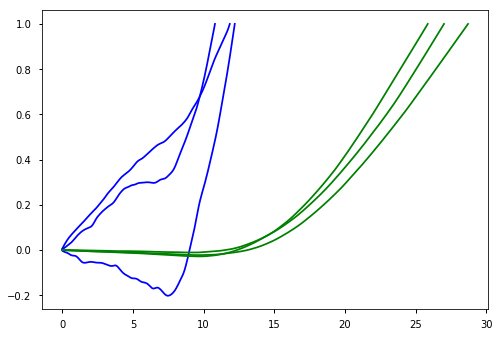

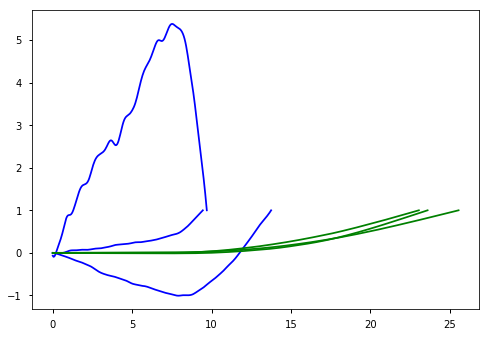

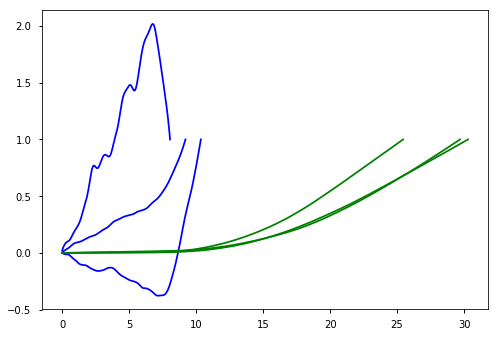

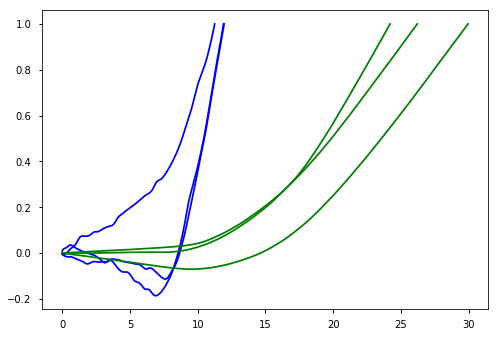

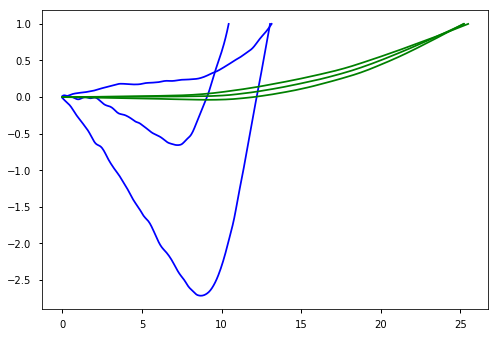

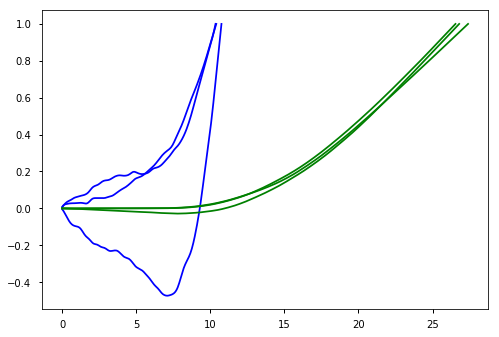

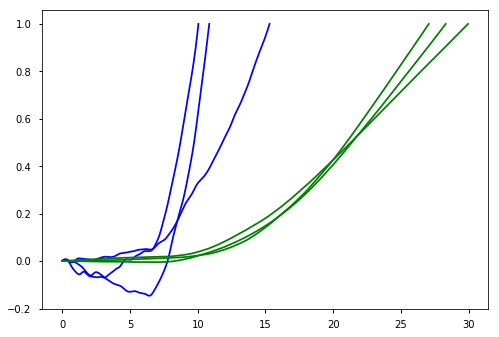

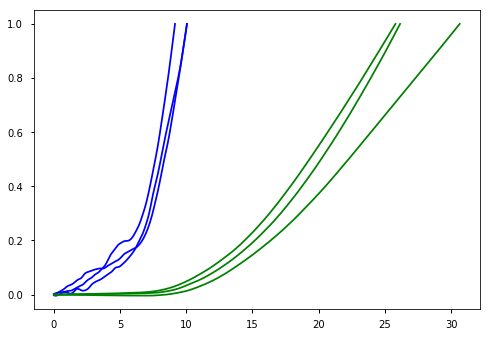

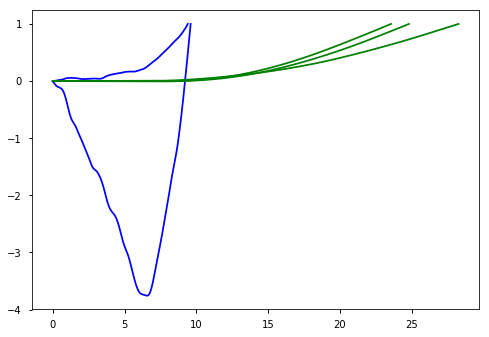

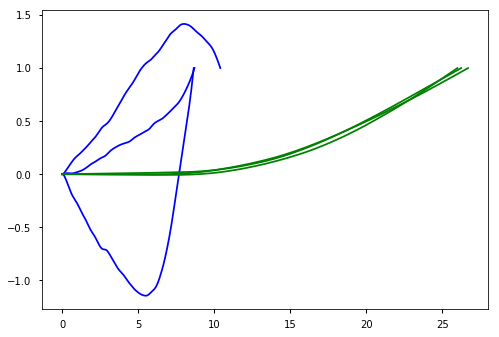

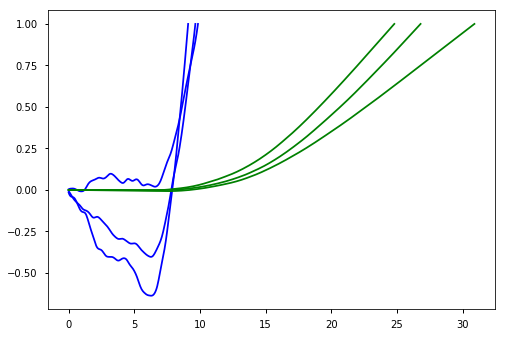

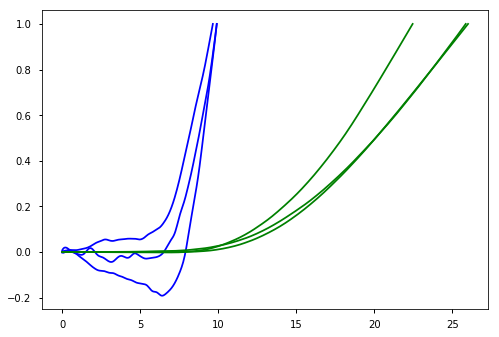

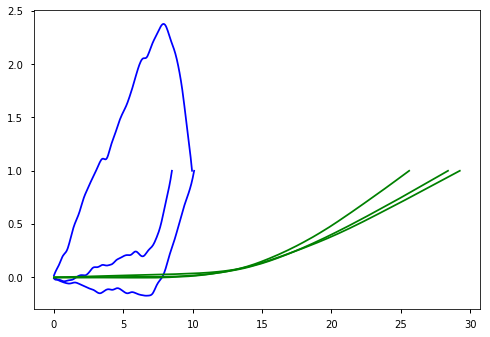

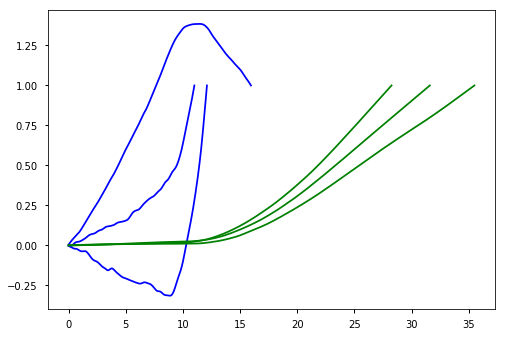

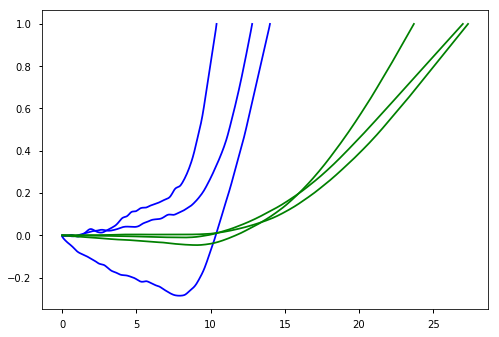

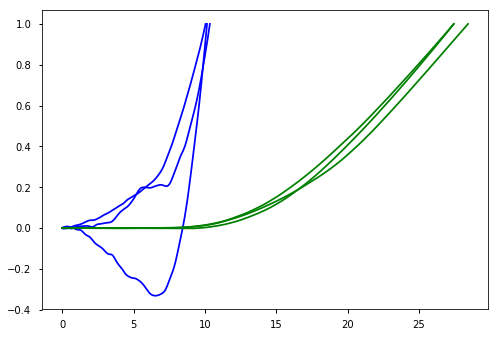

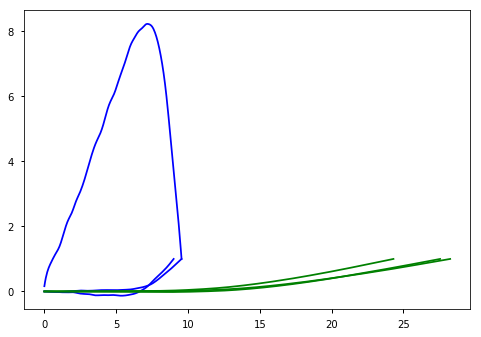

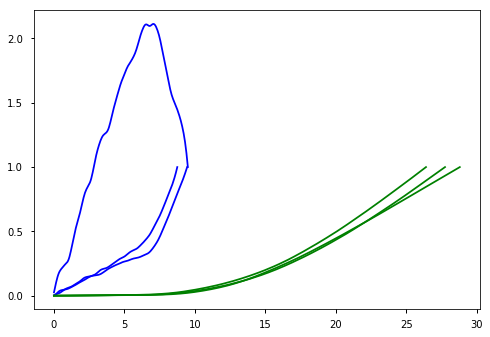

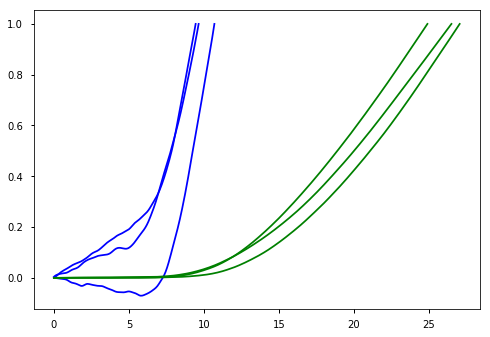

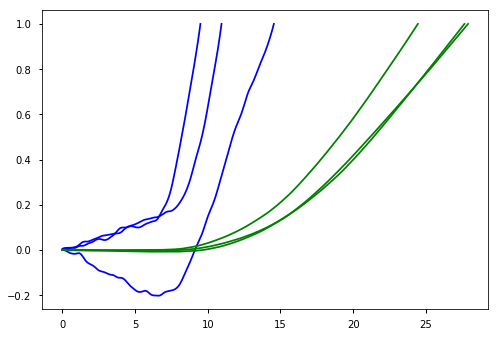

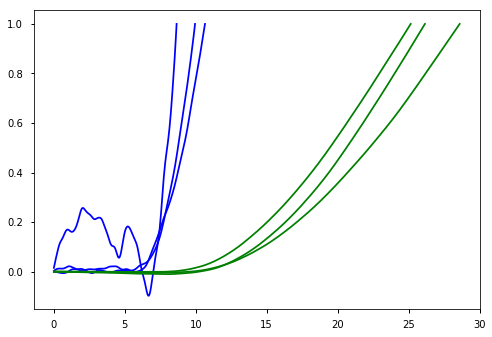

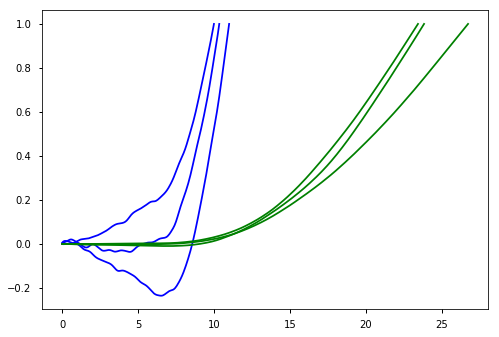

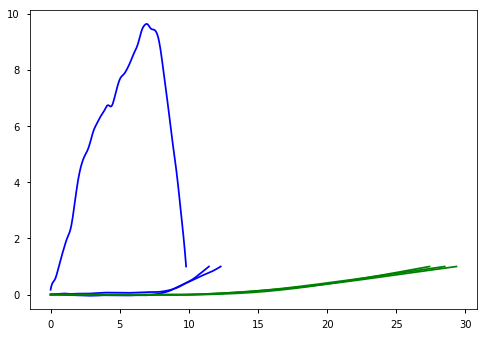

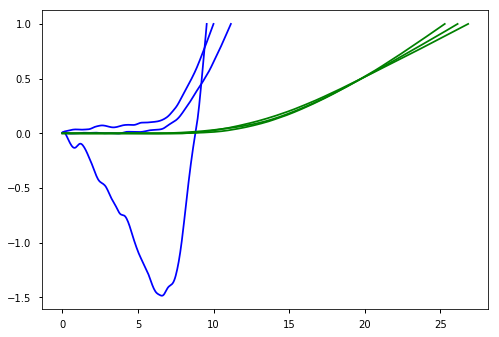

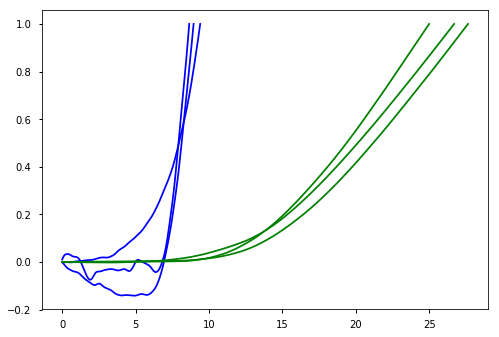

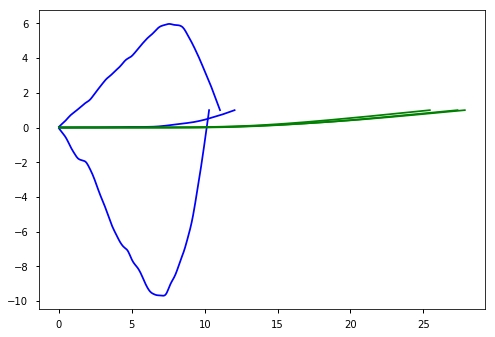

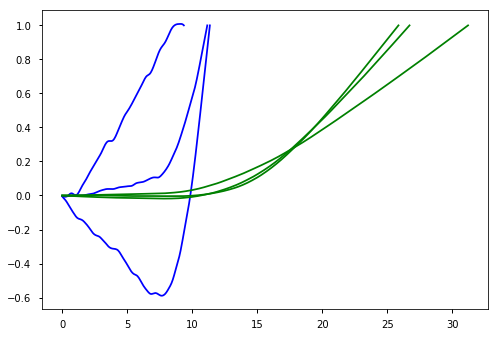

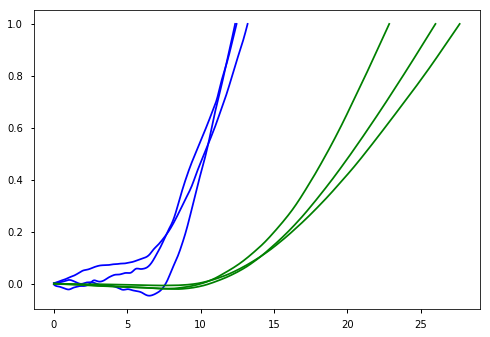

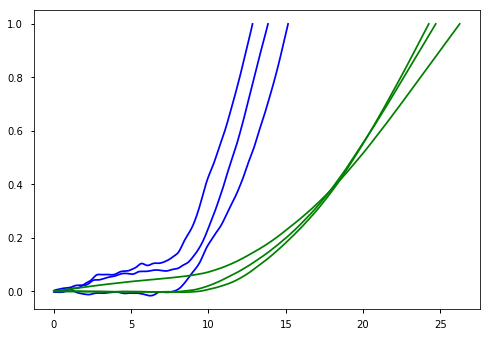

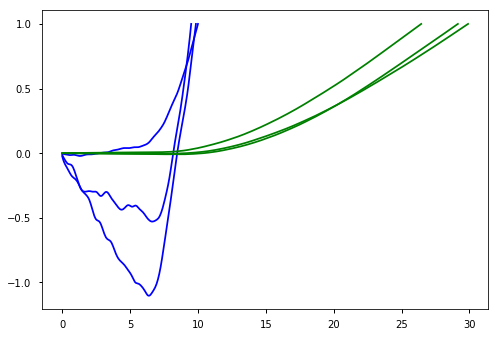

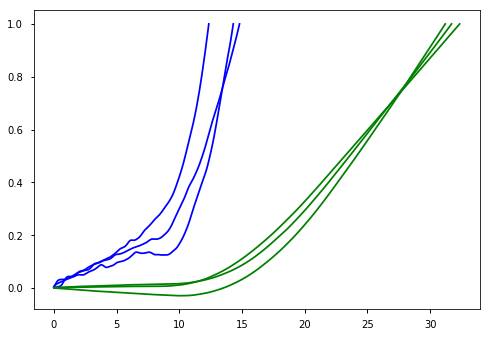

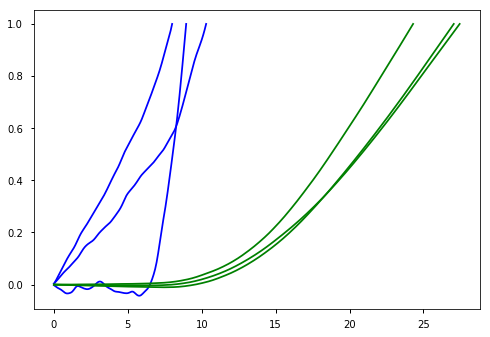

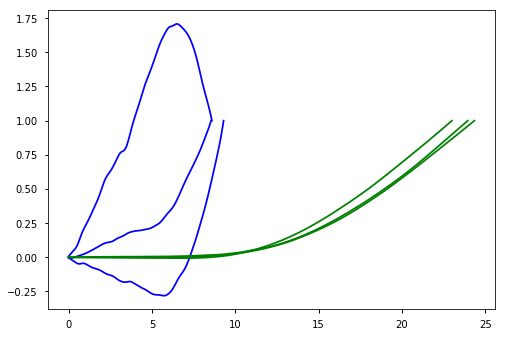

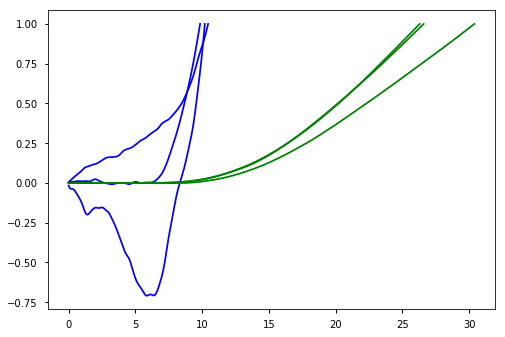

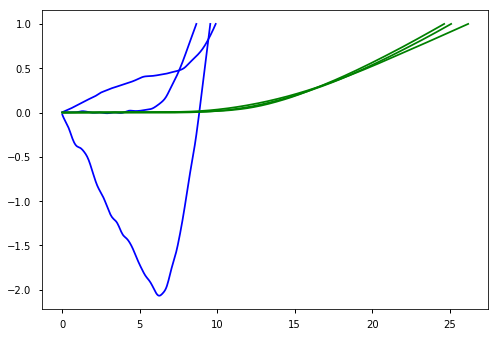

In [23]:
for squares in neuron.experiment["Control"].keys(): 
    for coord in neuron.experiment["Control"][squares].coordwise:
        fig, ax = plt.subplots()
        for trial in neuron.experiment["Control"][squares].coordwise[coord].trials:
            if trial.feature[3]:
                control_area = cumulativeArea(trial.interestWindow, trial.feature[3], trial.F_sample)
                #control_max = trial.feature[0]
                ax.plot(np.arange(len(control_area))*(1./20),control_area, c='b')
        for trial in neuron.experiment["GABAzine"][squares].coordwise[coord].trials:
            if trial.feature[3]:
                exc_area = cumulativeArea(trial.interestWindow, trial.feature[3], trial.F_sample)
                #exc_max = trial.feature[0]
                ax.plot(np.arange(len(exc_area))*(1./20),exc_area, c='g')